# @GRIP : The Sparks Foundation


# Author : Ounadi Ikram


## Computer Vision and Internet of objects


## Task-4 : Detection of face mask


In [18]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt


In [13]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, #No. of images to be yielded from the generator per batch. 
                                                    target_size=(150, 150)#is the size of your input images, every image will be resized to this size.)
VALIDATION_DIR = "./test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [16]:
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - 93s 692ms/step - loss: 0.6544 - acc: 0.6248 - val_loss: 0.3673 - val_acc: 0.8918
Epoch 2/10
132/132 [==============================] - 97s 734ms/step - loss: 0.3770 - acc: 0.8645 - val_loss: 0.3135 - val_acc: 0.8505
Epoch 3/10
132/132 [==============================] - 88s 668ms/step - loss: 0.3320 - acc: 0.8691 - val_loss: 0.2260 - val_acc: 0.8814
Epoch 4/10
132/132 [==============================] - 89s 670ms/step - loss: 0.2544 - acc: 0.8973 - val_loss: 0.2673 - val_acc: 0.8660
Epoch 5/10
132/132 [==============================] - 89s 674ms/step - loss: 0.2346 - acc: 0.9178 - val_loss: 0.0899 - val_acc: 0.9536
Epoch 6/10
132/132 [==============================] - 88s 665ms/step - loss: 0.2141 - acc: 0.9186 - val_loss: 0.1785 - val_acc: 0.9021
Epoch 7/10
132/132 [==============================] - 90s 679ms/step - loss: 0.1941 - acc: 0.9224 - val_loss: 0.0786 - val_acc: 0.9639
Epoch 8/10
132/132 [==============================] - 9

In [20]:
model.metrics_names


['loss', 'acc']

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

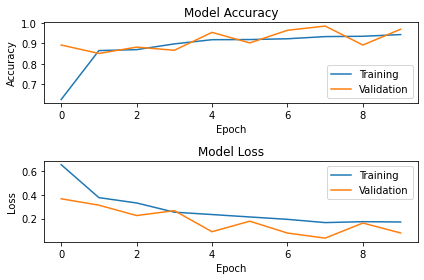

In [23]:
# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [37]:
import os
path = '/Users/ounadiikram/Documents'

model.save(os.path.join(path,'model-010.h5'))


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("/Users/ounadiikram/Documents/model-010.h5")

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

In [10]:
import PIL
from PIL import UnidentifiedImageError
import glob

imgs_ = glob.glob("./train/*/*.jpg")

for img in imgs_:
    try:
        img = PIL.Image.open(img)
    except PIL.UnidentifiedImageError:
        print(img)

./train/without_mask/indian-ethnicity-cheerful-confident-studio-260nw-552325924.jpg
